In [ ]:
from pathlib import Path
config = """[default]
url=https://api.qiqb-cloud.jp
api_token=XXXXXXXXXXX
"""
Path("~/.oqtopus").expanduser().write_text(config)
print("Configuration saved.")

## Submit job

In [1]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from src.adapter import QuriAdapter, collect_payloads_from_job

DEVICE = "anemone"
PROGRAM = "check_waveform"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{DEVICE}/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

print("sample:", payloads[:3], f"... len={len(payloads)}")


job_id = 068e747a-b8c1-72c0-8000-ad70fcd9ce66
job_status = succeeded  elapsed=15.37
sample: [{'mode': 'avg', 'data': {'Q08': {'raw': {'I': [-0.0012314112391322851, 0.0007400710019282997, 0.0016834377311170101, 0.0015123722841963172, -0.00024881403078325093, -0.0008778329938650131, -0.0006398797850124538, 1.7734404536895454e-05, 0.0001609376195119694, 0.00015788146993145347, -0.00026996448286809027, 0.00042772910092025995, 0.0009384881122969091, 0.0003602015785872936, 8.754278678679839e-05, 0.0004857494495809078, 0.00020134680380579084, 0.0004019778280053288, 0.0026117984671145678, 0.003751185955479741, -0.004923992790281773, -0.020895186811685562, -0.03325795382261276, -0.039967410266399384, -0.04267522320151329, -0.0463542565703392, -0.04780011251568794, -0.04688356816768646, -0.04651268944144249, -0.044705815613269806, -0.04318217188119888, -0.041265349835157394, -0.039236102253198624, -0.03858405724167824, -0.03722475841641426, -0.035523492842912674, -0.03380309045314789, -0.0313815

## Plot IQ data

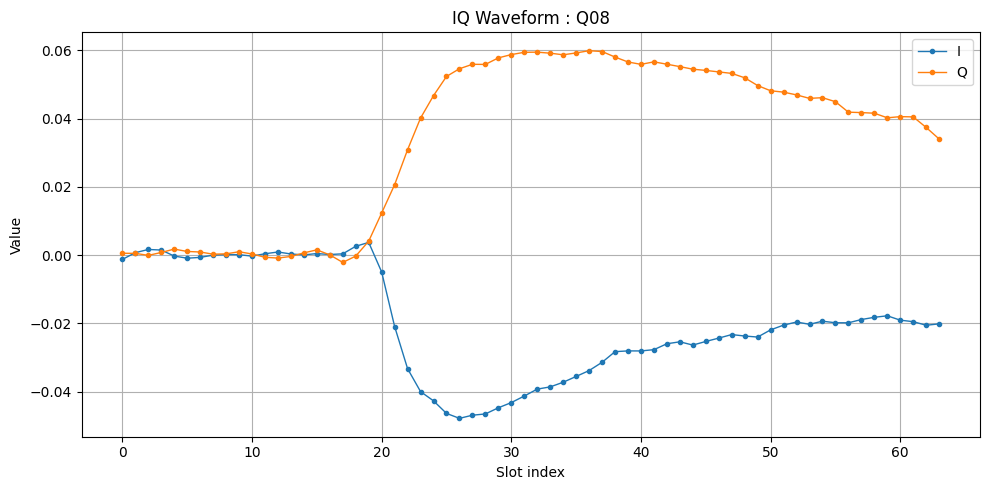

In [2]:
from src.plotters import plot_payload

p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)